In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import gridspec
from scipy.signal import find_peaks, peak_prominences

In [2]:
#Load data for bilayer 
path = '../Data/SAXS/NaCl_DNA_50C/np_files/'
filenames = os.listdir(path)

In [3]:
def plot_subplot(ax):
    data = np.load(path + filenames[i])
    ax.scatter(data[:,0], data[:,1], s = 10, color = 'red')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([0.002, 0.08])
    ax.set_ylim([1e-3, 5e3])
    ax.set_xticks([])
    ax.set_yticks([])
    # if start == 0 or start == 24:
    #     ax.scatter(0,0, color = 'blue', s = 100, label = '15 DNA-molecules/particle')
    #     ax.scatter(0,0, color = 'red', s = 100, label = '25 DNA-molecules/particle')
    #     ax.legend(fontsize=16, loc=0)


def plot_subplot_2(ax):
    data = np.load(path + filenames[i+20])
    ax.scatter(data[:,0], data[:,1], s = 10, color = 'blue')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([0.002, 0.08])
    ax.set_ylim([1e-3, 5e3])
    ax.set_xticks([])
    ax.set_yticks([])
    # if start == 0 or start == 24:
    #     ax.scatter(0,0, color = 'blue', s = 100, label = '15 DNA-molecules/particle')
    #     ax.scatter(0,0, color = 'red', s = 100, label = '25 DNA-molecules/particle')
    #     ax.legend(fontsize=16, loc=0)


def plot_subplot_original(start, stop, ax):
    for i in range(start, stop):
        labels = ['15 DNA-molecules/particle', '25 DNA-molecules/particle']
        data = np.load(path + filenames[i])
        colors = ['black', 'green']
        ax.scatter(data[:,0], data[:,1]/data[:,1][20], s = 10, color = colors[i - start])
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim([0.001, 0.08])
        ax.set_ylim([1e-4, 1e2])
        ax.set_xticks([])
        ax.set_yticks([])

## Invert Y-axis

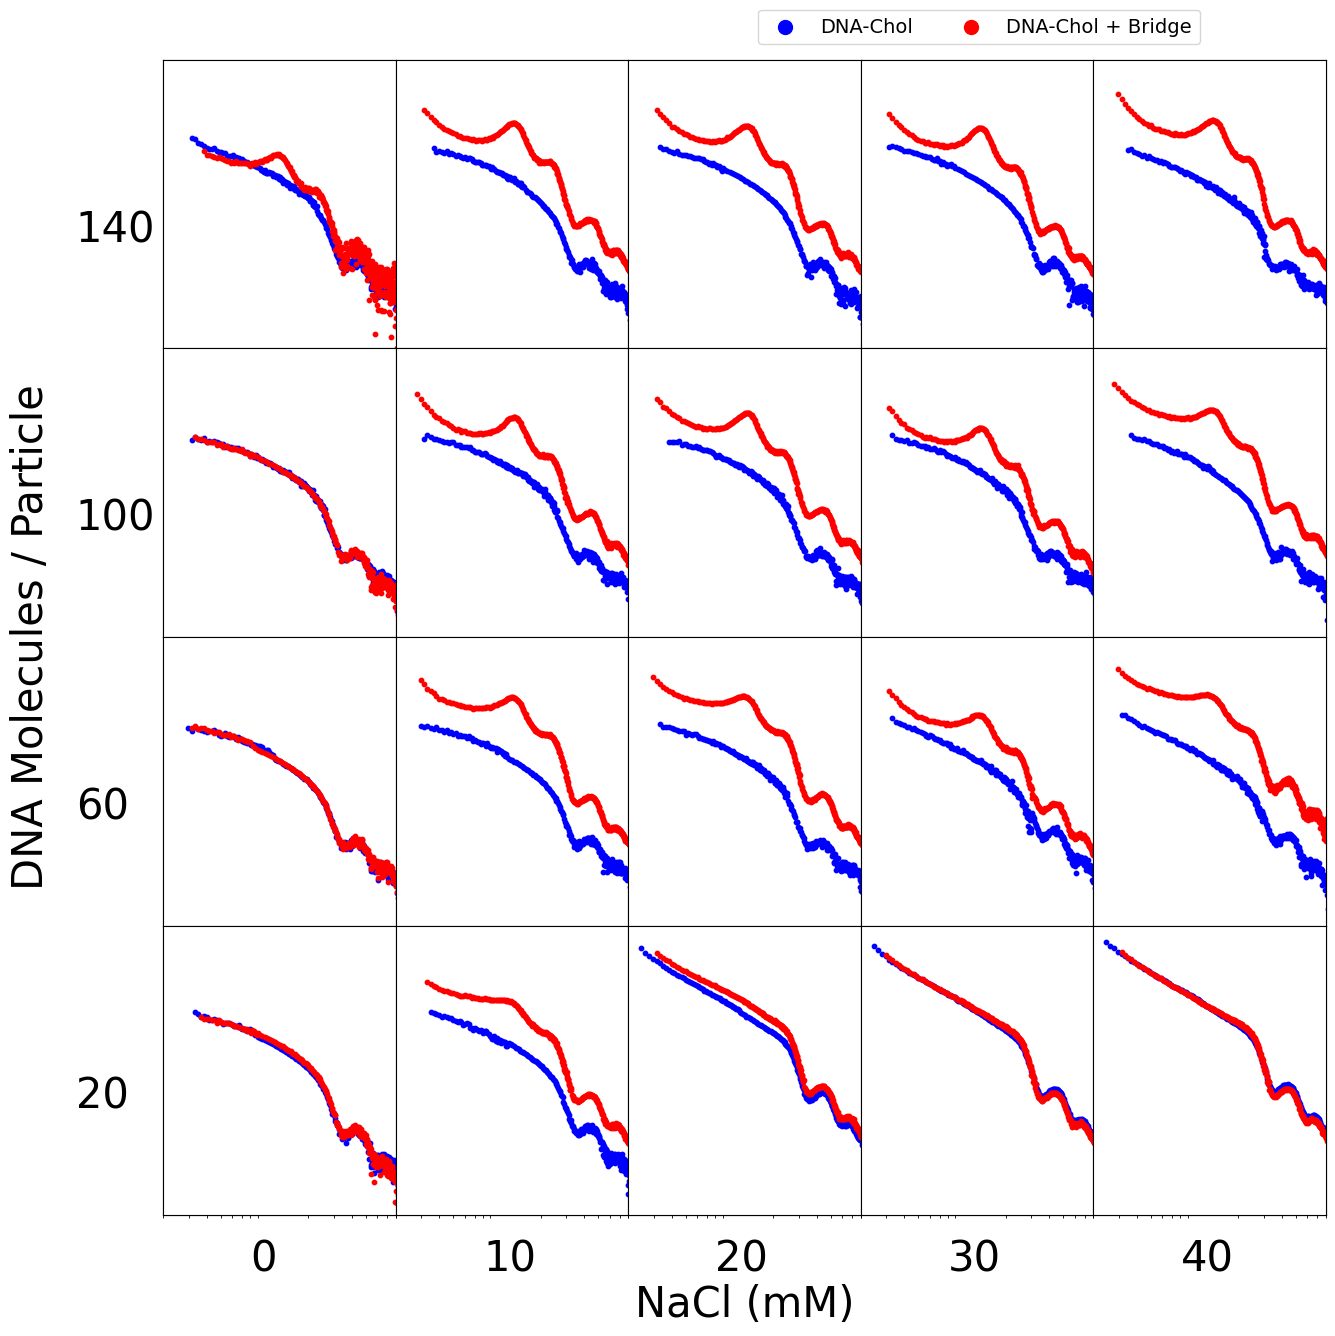

In [ ]:
plt.rcParams.update({'font.size': 30})
#fig, ax = plt.subplots(figsize=(10,10), ncols = 4, nrows = 4, sharex=True, sharey=True, hspace=0, yspace=0)
fig, ax = plt.subplots(figsize=(15,15))
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.ylabel('DNA Molecules / Particle', labelpad = 80)
plt.xlabel('NaCl (mM)', labelpad=50)
gs = fig.add_gridspec(4, 5, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')

# ax[0,0].scatter(0,0, color = 'red', s = 100, label = 'DNA Bridge')
# ax[0,0].scatter(0,0, color = 'blue', s = 100, label = 'No DNA Bridge')
# ax[0,0].scatter(0,0, color = 'black', s = 100, label = 'Bare Silica (ref.)')
# ax[0,0].scatter(0,0, color = 'green', s = 100, label = 'Silica/DOPC (ref.)')
# ax[0,0].legend(fontsize=14, mode='expand')


plt.scatter(0,0, color = 'blue', s = 100, label = 'DNA-Chol')
plt.scatter(0,0, color = 'red', s = 100, label = 'DNA-Chol + Bridge')

plt.legend(loc='lower right', bbox_to_anchor=(0.5, 4.02), ncol=4, fontsize=14)

ax[0,0].text(0.0005, 0.3e0, '140')
ax[1,0].text(0.0005, 0.3e0, '100')
ax[2,0].text(0.0005, 0.3e0, '60')
ax[3,0].text(0.0005, 0.3e0, '20')


ax[3,0].text(0.008, 0.5e-4, '0')
ax[3,1].text(0.008, 0.5e-4, '10')
ax[3,2].text(0.008, 0.5e-4, '20')
ax[3,3].text(0.008, 0.5e-4, '30')
ax[3,4].text(0.008, 0.5e-4, '40')

# for i, row  in enumerate(range(3, -1, -1)):
#     for j, col in enumerate(range(0, 5)):
#         print(i)
#         axs = ax[row, col]
#         plot_subplot(axs)

# for i, row  in enumerate(range(3, -1, -1)):
#     for j, col in enumerate(range(0, 5)):
#         axs = ax[row, col]
#         plot_subplot_2(axs)



i = 0 
for row in range(3, -1, -1):
    for col in range(0, 5):
        axs = ax[row, col]
        plot_subplot_2(axs)
        i = i + 1

i = 0 
for row  in range(3, -1, -1):
    for col in range(0, 5):
        axs = ax[row, col]
        plot_subplot(axs)
        i = i + 1



# for i in range(12, 24):
#     axs = ax.flatten()[i-12]
#     start = i*2
#     stop = start + 2
#     plot_subplot_2(start, stop, axs)

#plt.savefig('../Figures/WellPlate_20_Bridge_18_HBP_50C_DOPC.png', dpi=600, bbox_inches="tight")

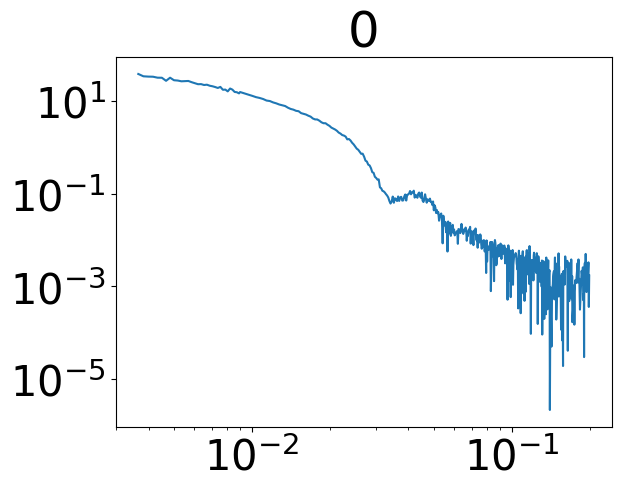

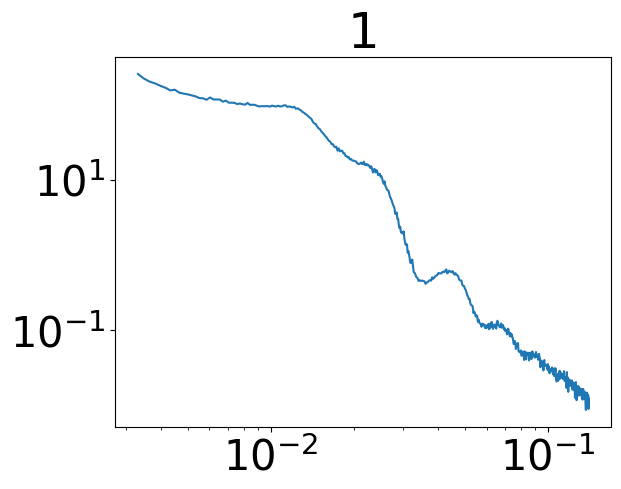

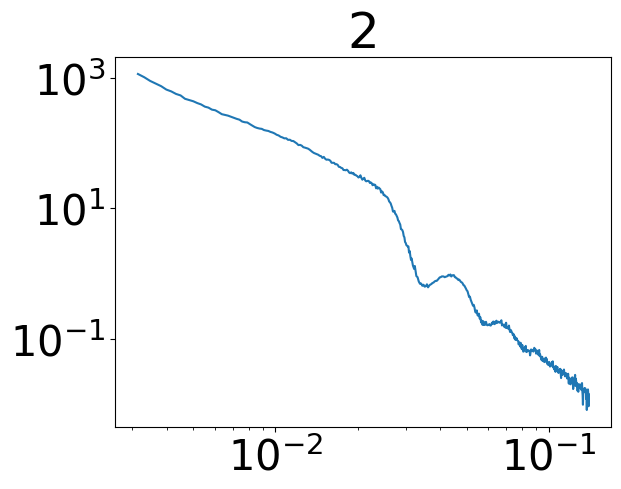

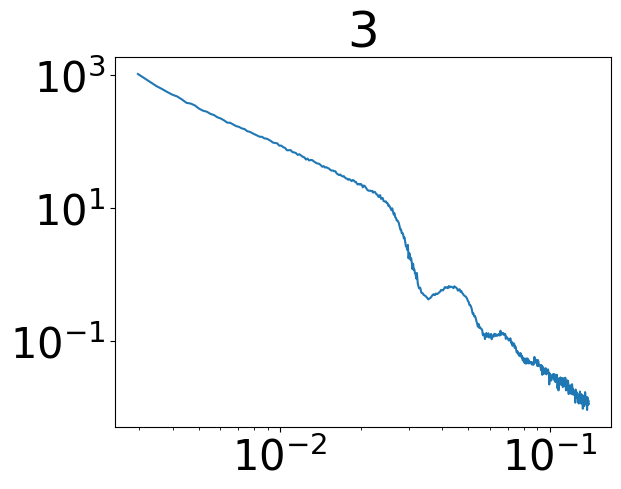

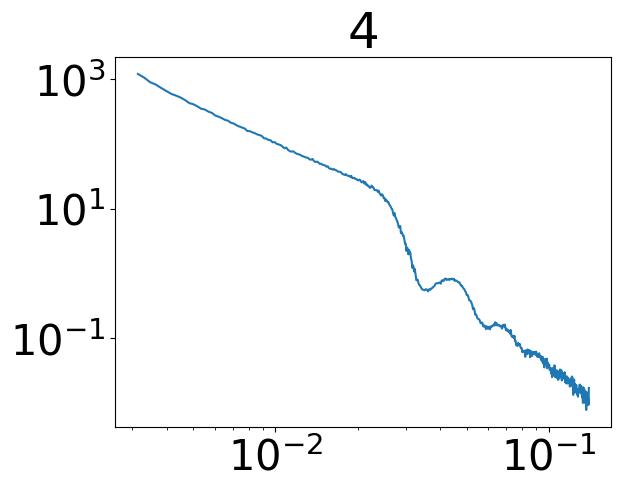

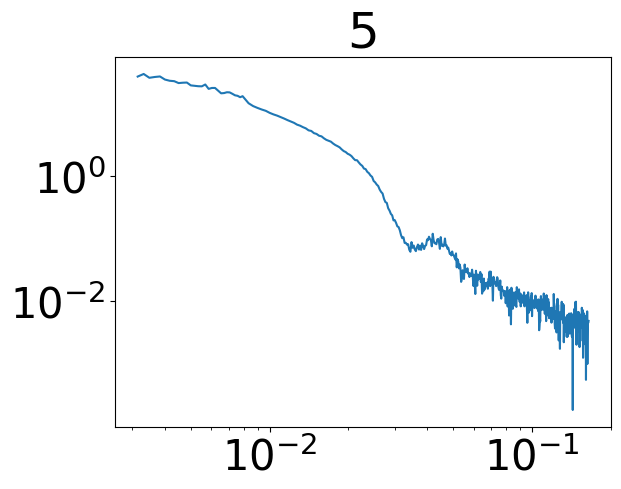

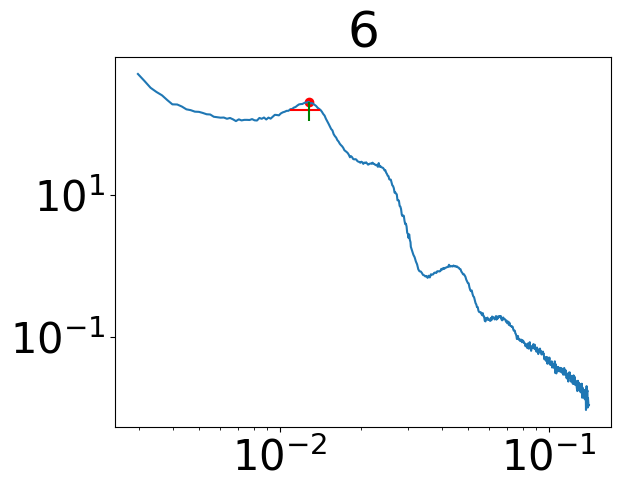

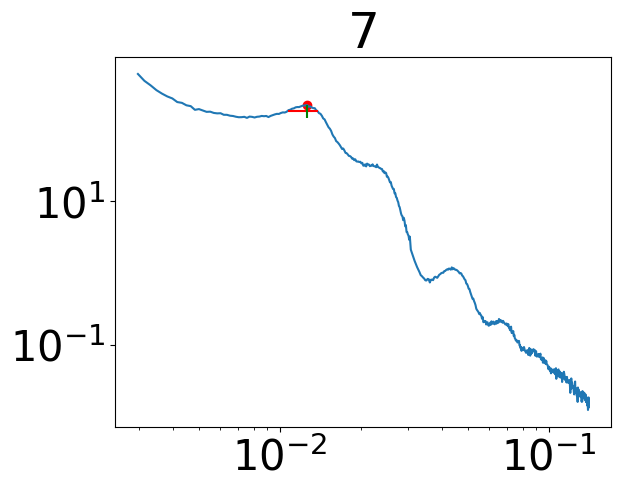

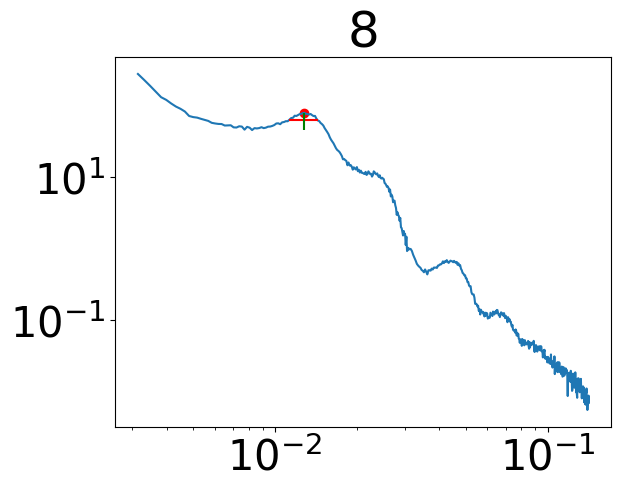

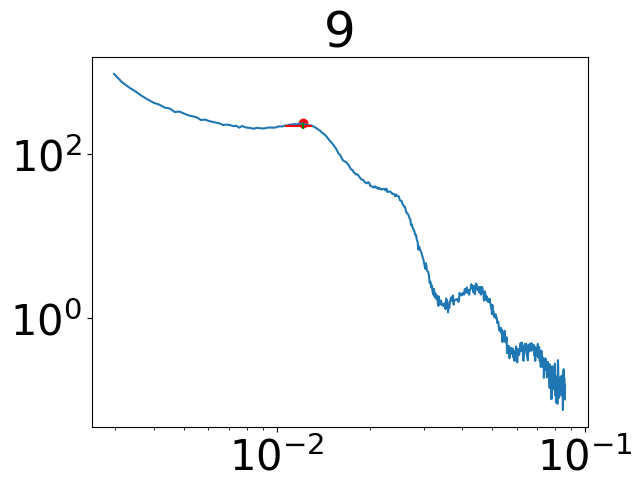

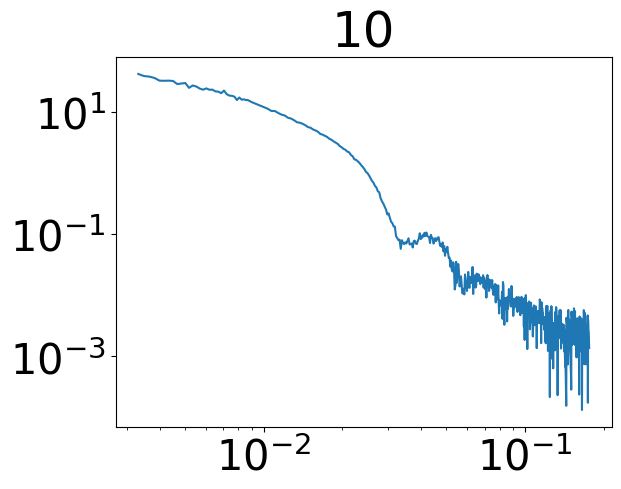

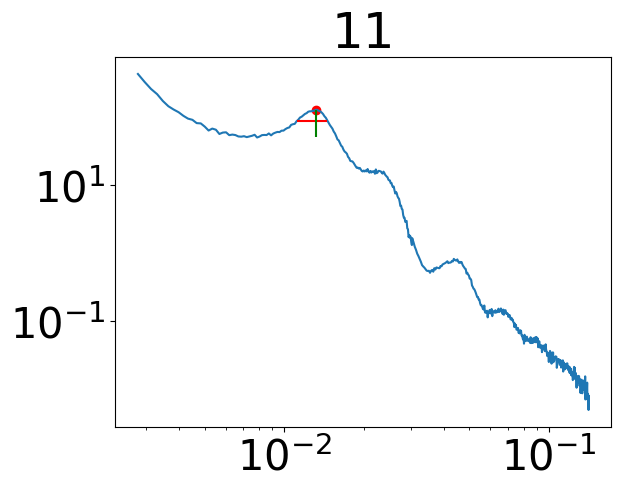

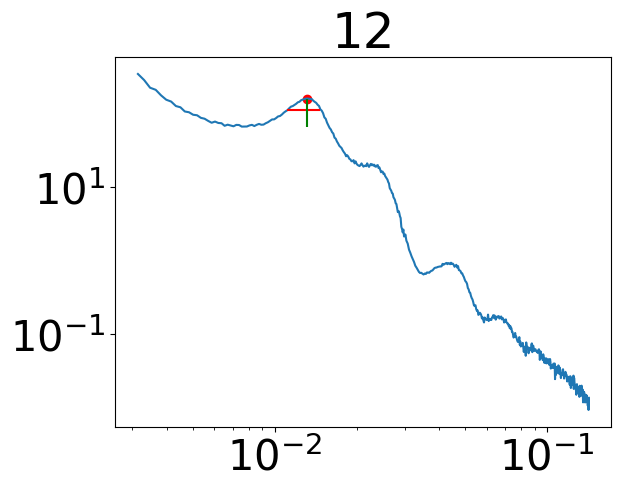

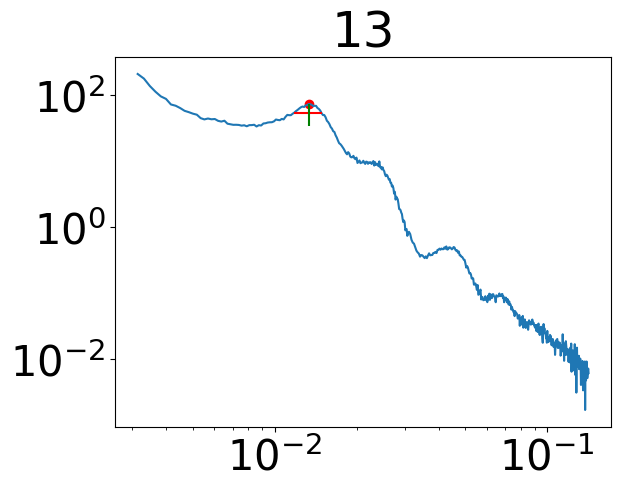

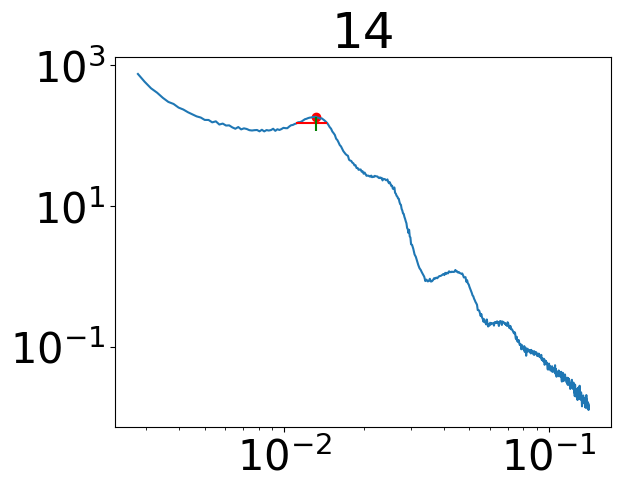

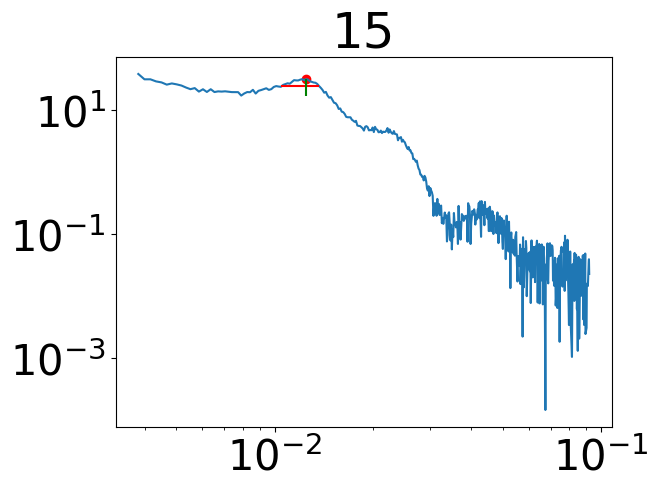

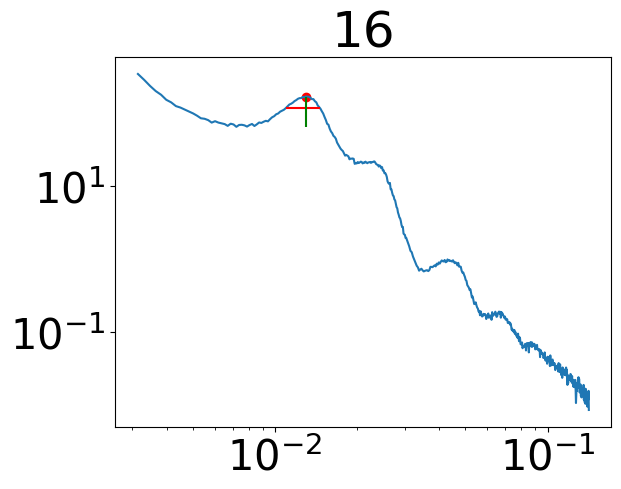

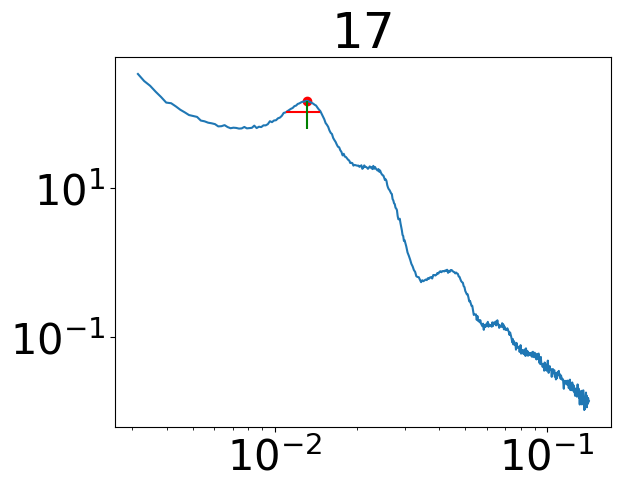

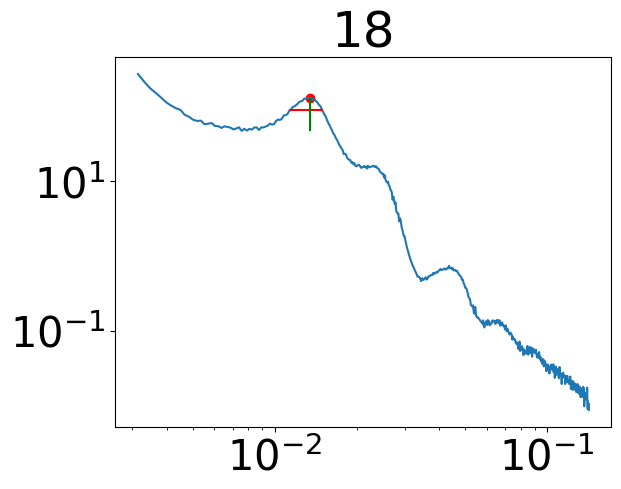

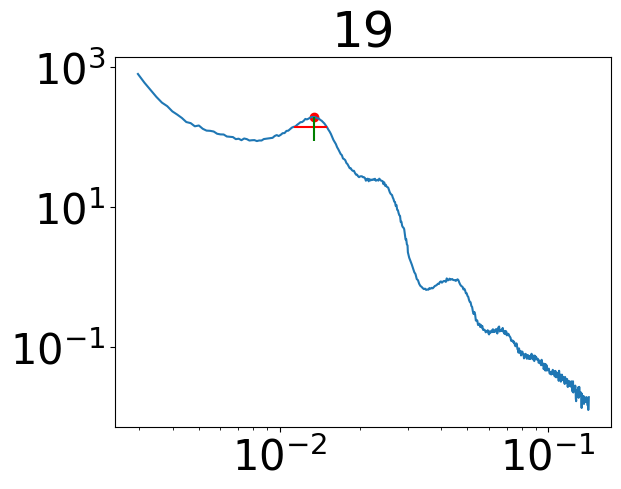

In [7]:
peak_height = []
peak_broadness = []
promi = []
peak_loc = []
for i in range(20):
    data = np.load(path + filenames[i])
    fig, ax = plt.subplots()
    loc, params = find_peaks(data[:-70,1], width=5, height=30)
    plt.loglog(data[:,0], data[:,1])
    plt.title(str(i))
    #plt.xlim([0.003, 0.2])
    #plt.scatter([],[])
    if loc.shape[0] > 0:
        plt.scatter(data[:-70,0][loc], data[:-70,1][loc], color = 'red')
        left_ips = data[:,0][int(np.round(params['left_ips'][0]))]
        right_ips = data[:,0][int(np.round(params['right_ips'][0]))]
        plt.hlines(params['peak_heights'] - params['prominences']/2, left_ips, right_ips, color='red')

        prominences = peak_prominences(data[:-70,1], loc)[0]
        contour_heights = data[:-70,1][loc] - prominences
        plt.vlines(x=data[loc[0],0], ymin=contour_heights[0], ymax=data[:-70,1][loc], color='green')

        peak_height.append(params['peak_heights'][0])
        peak_broadness.append(right_ips - left_ips)
        promi.append(params['prominences'][0])
        peak_loc.append(data[loc[0],0])
    else:
        peak_height.append(0)
        peak_broadness.append(0)
        promi.append(0)
        peak_loc.append(0)

Text(0, 0.5, 'Peak Prominence')

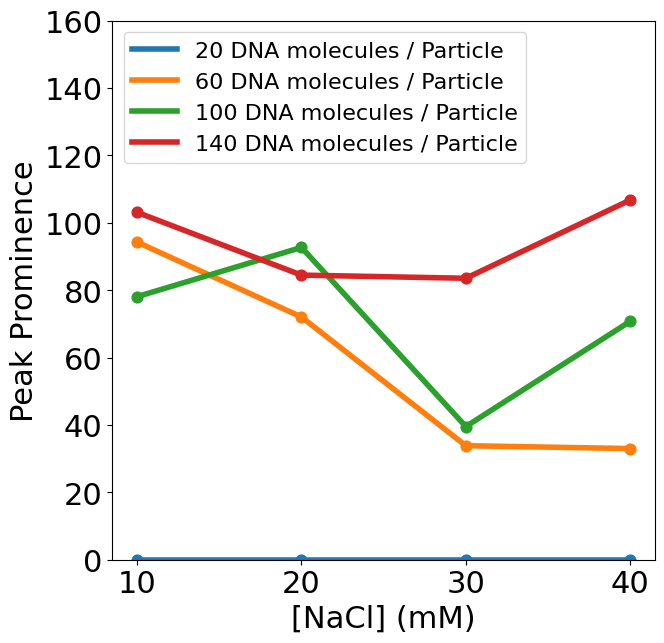

In [8]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(7,7))
plt.plot([10, 20, 30, 40], promi[1:5], label = '20 DNA molecules / Particle', linewidth = 4)
plt.plot([10, 20, 30, 40], promi[6:10], label = '60 DNA molecules / Particle', linewidth = 4)
plt.plot([10, 20, 30, 40], promi[11:15], label = '100 DNA molecules / Particle', linewidth = 4)
plt.plot([10, 20, 30, 40], promi[16:20], label = '140 DNA molecules / Particle', linewidth = 4)
plt.scatter([10, 20, 30, 40], promi[1:5], s=60)
plt.scatter([10, 20, 30, 40], promi[6:10], s=60)
plt.scatter([10, 20, 30, 40], promi[11:15], s=60)
plt.scatter([10, 20, 30, 40], promi[16:20], s=60)
plt.xticks([10, 20, 30, 40])
plt.ylim([0, 160])
plt.legend(fontsize = 16, loc = 2)
plt.xlabel('[NaCl] (mM)')
plt.ylabel('Peak Prominence')
#plt.savefig('../../Figures/240921/Peak_Prominence_20_Bridge_18_HBP_Room_Temp_DOPC.png', dpi=600, bbox_inches="tight")